In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
## collab user
# !pip install neuron
# !pip install netpyne
# !git clone https://github.com/suny-downstate-medical-center/S1_netpyne.git
# import os
# os.chdir('S1_netpyne/info')

In [3]:
import matplotlib
import os
os.chdir('../sim')

In [4]:
# !nrnivmodl mod/

In [5]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""

from netpyne import specs, sim
import pickle, json
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()  

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 1.0*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -65}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True

cfg.checkErrors = True

cfg.poptypeNumber = 55
cfg.celltypeNumber = 207

cfg.rootFolder = os.getcwd()

In [6]:
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

cfg.popNumber = {}
cfg.cellNumber = {} 
cfg.popLabel = {} 
popParam = []
cellParam = []
cfg.meParamLabels = {} 
cfg.popLabelEl = {} 
cfg.cellLabel = {}

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cfg.cellNumber[metype] = int(n)
    cfg.popLabel[metype] = mtype
    cfg.popNumber[mtype] = int(m)
    cfg.cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        cfg.popLabelEl[mtype] = [] 
               
    cfg.popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])
    
cfg.S1pops = popParam
cfg.S1cells = cellParam

cfg.popParamLabels = popParam
cfg.cellParamLabels = cellParam
#------------------------------------------------------------------------------  
# number=0
# for mtype in cfg.S1pops:
#     for cellEl in range(np.size(cfg.popLabelEl[mtype])):
#         number+=1
#         print(number,cfg.popLabelEl[mtype][cellEl], cfg.popLabel[cfg.popLabelEl[mtype][cellEl]], popLabelEl[cfg.popLabelEl[mtype][cellEl]])

In [7]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
cfg.reducedtest = False    

# TO DEBUG - Create only 5 Cells for each MEtype in S1
cfg.oneCellperMEtypeS1 = False 

In [8]:
#------------------------------------------------------------------------------  
# TO DEBUG - Create only one Cell per MEtype in S1 cells
if cfg.oneCellperMEtypeS1:
	cfg.popNumber = {}
	cfg.cellNumber = {} 
	for mtype in cfg.S1pops:
		cfg.popNumber[mtype] = 0

	for line in mtype_content.split('\n')[:-1]:
		cellname, mtype, etype, n, m = line.split()
		metype = mtype + '_' + etype[0:3]
		if int(n) < 5:
			cfg.cellNumber[metype] = int(n)
			cfg.popNumber[mtype] = cfg.popNumber[mtype] + int(n)
		else:
			cfg.cellNumber[metype] = 5
			cfg.popNumber[mtype] = cfg.popNumber[mtype] + 5


In [9]:
cfg.S1pops = popParam
cfg.S1cells = cellParam

cfg.popParamLabels = popParam
cfg.cellParamLabels = cellParam

In [10]:
subPopLabels = cfg.S1pops[0:15]
#------------------------------------------------------------------------------  
cfg.S1pops = subPopLabels
cfg.S1cells = []
for metype in cfg.cellParamLabels:
    if cfg.popLabel[metype] in subPopLabels:        
        cfg.S1cells.append(metype)
        
cfg.thalamicpops = []

cfg.popParamLabels = cfg.S1pops
cfg.cellParamLabels = cfg.S1cells
#------------------------------------------------------------------------------  
for metype in cfg.cellParamLabels:
    print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])   

L1_DAC_bNA 19 L1_DAC 58
L1_DAC_cNA 39 L1_DAC 58
L1_DLAC_cNA 24 L1_DLAC 24
L1_HAC_bNA 19 L1_HAC 91
L1_HAC_cIR 10 L1_HAC 91
L1_HAC_cNA 62 L1_HAC 91
L1_NGC-DA_bNA 8 L1_NGC-DA 72
L1_NGC-DA_cAC 8 L1_NGC-DA 72
L1_NGC-DA_cNA 48 L1_NGC-DA 72
L1_NGC-DA_cST 8 L1_NGC-DA 72
L1_NGC-SA_cNA 52 L1_NGC-SA 52
L1_SLAC_bNA 14 L1_SLAC 41
L1_SLAC_cAC 8 L1_SLAC 41
L1_SLAC_cNA 19 L1_SLAC 41
L23_BP_bAC 3 L23_BP 28
L23_BP_bIR 4 L23_BP 28
L23_BP_bNA 7 L23_BP 28
L23_BP_cAC 7 L23_BP 28
L23_BP_cNA 4 L23_BP 28
L23_BP_dST 3 L23_BP 28
L23_BTC_bAC 15 L23_BTC 104
L23_BTC_bIR 7 L23_BTC 104
L23_BTC_bNA 23 L23_BTC 104
L23_BTC_cAC 41 L23_BTC 104
L23_BTC_cNA 18 L23_BTC 104
L23_ChC_cAC 23 L23_ChC 61
L23_ChC_cNA 23 L23_ChC 61
L23_ChC_dNA 15 L23_ChC 61
L23_DBC_bAC 12 L23_DBC 175
L23_DBC_bIR 32 L23_DBC 175
L23_DBC_bNA 70 L23_DBC 175
L23_DBC_cAC 61 L23_DBC 175
L23_LBC_bAC 35 L23_LBC 456
L23_LBC_bNA 27 L23_LBC 456
L23_LBC_cAC 108 L23_LBC 456
L23_LBC_cNA 76 L23_LBC 456
L23_LBC_cST 22 L23_LBC 456
L23_LBC_dNA 188 L23_LBC 456
L23_MC_b

In [11]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
cfg.allpops = cfg.cellParamLabels
cfg.cellsrec = 2
if cfg.cellsrec == 0:  cfg.recordCells = cfg.allpops # record all cells
elif cfg.cellsrec == 1: cfg.recordCells = [(pop,0) for pop in cfg.allpops] # record one cell of each pop
elif cfg.cellsrec == 2: # record one cell of each cellMEtype
    cfg.recordCells = []
    for metype in cfg.cellParamLabels:
        if cfg.cellNumber[metype] < 5:
            for numberME in range(cfg.cellNumber[metype]):
                cfg.recordCells.append((metype,numberME))
        else:
            numberME = 0
            diference = cfg.cellNumber[metype] - 5.0*int(cfg.cellNumber[metype]/5.0)
            
            for number in range(5):            
                cfg.recordCells.append((metype,numberME))
                
                if number < diference:              
                    numberME+=int(np.ceil(cfg.cellNumber[metype]/5.0))  
                else:
                    numberME+=int(cfg.cellNumber[metype]/5.0)
                
        
cfg.recordTraces = {'V_soma': {'sec':'soma', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record
cfg.recordStim = False
cfg.recordTime = False
cfg.recordStep = 0.1    

In [12]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'subNets_test0'
cfg.saveFolder = '../info/test/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = True	           	## Save json file
cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = False	

In [13]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [14]:
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000	


cellModels = ['HH_full']
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in cfg.S1pops:
    if popName not in Epops:
        Ipops.append(popName)

Epops = []
for popName in cfg.S1pops:
    if popName not in Ipops:
        Epops.append(popName)   

layer = {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries


In [15]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)(M1: 2.0 ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)(M1: 500.0um/ms)
# netParams.scaleConnWeight = 0.001 # weight conversion factor (from nS to uS)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [16]:
# #------------------------------------------------------------------------------
# # Cell parameters  # L1 70  L23 215  L4 230 L5 260  L6 260  = 1035
# #------------------------------------------------------------------------------
# ## Load cell rules using BBP template
# def loadTemplateName(cellMe):     
#     outFolder = cfg.rootFolder+'/cell_data/'+cellMe
#     try:
#         f = open(outFolder+'/template.hoc', 'r')
#         for line in f.readlines():
#             if 'begintemplate' in line:
#                 return str(line)[14:-1]     
#     except:
#         print('Cannot read cell template from %s' % (outFolder))
#         return False


# cellnumber = 0    
# for cellName in cfg.S1cells:
    
#     if cfg.cellNumber[cellName] < 5:
#         morphoNumbers = cfg.cellNumber[cellName]
#     else:
#         morphoNumbers = 5
    
#     cellFraction = 1.0/morphoNumbers
    
#     for morphoNumber in range(morphoNumbers):
#         cellMe = cfg.cellLabel[cellName] + '_' + str(morphoNumber+1)
#         print(cellMe,cellName)
        
#         cellTemplateName = loadTemplateName(cellMe)
        
#         if cellTemplateName:
            
#             cellRule = netParams.importCellParams(label=cellMe, somaAtOrigin=True,
#                 conds={'cellType': cellMe, 'cellModel': 'HH_full'},
#                 fileName='cellwrapper.py',
#                 cellName='loadCell',
#                 cellInstance = True,
#                 cellArgs={'cellName': cellMe, 'cellTemplateName': cellTemplateName})
            
#             netParams.renameCellParamsSec(label=cellMe, oldSec='soma_0', newSec='soma')              
#             for secname2 in netParams.cellParams[cellMe]['secLists'].keys():
#              if 'soma_0' in netParams.cellParams[cellMe]['secLists'][secname2]:
#                print(cellMe,secname2,netParams.cellParams[cellMe]['secLists'][secname2][0])
#                netParams.cellParams[cellMe]['secLists'][secname2][0] = 'soma'    

In [17]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------
# S1
cfg.scaleDensity = 1.0

for cellName in cfg.S1cells:
	layernumber = cellName[1:2]
	if layernumber == '2':
		netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer['23'], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.cellNumber[cellName])), 'diversity': True}
	else:
		netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 
                                        'numCells': int(np.ceil(cfg.scaleDensity*cfg.cellNumber[cellName])), 'diversity': True}

In [18]:
## S1 cell property rules
cellnumber = 0    
for cellName in cfg.S1cells:
    
    if cfg.cellNumber[cellName] < 5:
        morphoNumbers = cfg.cellNumber[cellName]
    else:
        morphoNumbers = 5
    
    cellFraction = 1.0/morphoNumbers
    
    for morphoNumber in range(morphoNumbers):
        cellMe = cfg.cellLabel[cellName] + '_' + str(morphoNumber+1)
        
        # Load cell rules previously saved using netpyne format
        netParams.loadCellParamsRule(label = cellMe, fileName = 'cell_data/' + cellMe + '/' + cellMe + '_cellParams.json')   
        
#         cellRule = {'conds': {'cellType': cellName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
#         cellRule['secs'] = netParams.cellParams[cellMe]['secs']     
#         cellRule['conds'] = netParams.cellParams[cellMe]['conds']    
#         cellRule['conds']['cellType'] = cellName
#         cellRule['globals'] = netParams.cellParams[cellMe]['globals']       
#         cellRule['secLists'] = netParams.cellParams[cellMe]['secLists']       
                              
#         cellRule['secLists']['spiny'] = {}
#         cellRule['secLists']['spinyEE'] = {}

#         nonSpiny = ['axon_0', 'axon_1']
#         cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
#         nonSpinyEE = ['axon_0', 'axon_1', 'soma']
#         cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpinyEE]

        #-----------------------------------------------------------------------------------#
        if cfg.reducedtest:
            cellRule = {'conds': {'cellType': cellName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
            cellRule['conds'] = netParams.cellParams[cellMe]['conds']    
            cellRule['secs'] = {}
            cellRule['secs']['soma'] = netParams.cellParams[cellMe]['secs']['soma']
            cellRule['secLists'] = {}
            cellRule['secLists']['spiny'] = ['soma']
            cellRule['secLists']['spinyEE'] = ['soma']
            cellRule['secLists']['all'] = ['soma']
            cellRule['secLists']['basal'] = ['soma']   
            cellRule['secLists']['apical'] = ['soma']    
            netParams.cellParams[cellMe] = cellRule   # add dict to list of cell params   
        #-----------------------------------------------------------------------------------#

In [19]:
# for cellName in cfg.S1cells:    
#     if cfg.cellNumber[cellName] < 5:
#         morphoNumbers = cfg.cellNumber[cellName]
#     else:
#         morphoNumbers = 5    
    
#     for morphoNumber in range(morphoNumbers):
#         cellMe = cfg.cellLabel[cellName] + '_' + str(morphoNumber+1)
#         outFolder = cfg.rootFolder+'/cell_data/'+cellMe
#         netParams.saveCellParamsRule(label=cellMe, fileName=outFolder+'/'+cellMe+'_cellParams.json')

In [20]:
#------------------------------------------------------------------------------
# load data from S1 conn pre-processing file 
#------------------------------------------------------------------------------
with open('conn/conn.pkl', 'rb') as fileObj: connData = pickle.load(fileObj)

lmat = connData['lmat']
a0mat = connData['a0mat']
d0 = connData['d0']

a0e = connData['a0mat_exp']
l0e = connData['lmat_exp']
d0e = connData['d0_exp']

a0g = connData['a0mat_gauss']
x0g = connData['x0_gauss']
l0g = connData['lmat_gauss']
d0g = connData['d0_gauss']

dfinal = connData['dfinal']
pmat = {}
pmat[12.5] = connData['pmat12um']
pmat[25] = connData['pmat25um']
pmat[50] = connData['pmat50um']
pmat[75] = connData['pmat75um']
pmat[100] = connData['pmat100um']
pmat[125] = connData['pmat125um']
pmat[150] = connData['pmat150um']
pmat[175] = connData['pmat175um']
pmat[200] = connData['pmat200um'] #max value for d0=200

synperconnNumber = connData['synperconnNumber']
connNumber = connData['connNumber']
decay = connData['decay']
gsyn = connData['gsyn']
use = connData['use']

ConnTypesNumber = connData['ConnTypesNumber'] 
ConnTypes = connData['ConnTypes']   

connIEtype = connData['connIEtype']  
connEItype = connData['connEItype']
parameters_syn = connData['parameters_syn']

In [21]:
import pandas as pd

physColumnNames = []
syntypes = []
for name,syntype in parameters_syn:    
    if name not in physColumnNames:
        physColumnNames.append(name) 
    if syntype not in syntypes:
        syntypes.append(syntype)
        
#     print(name,syntype,parameters_syn[name,syntype])
dfS6 = pd.DataFrame(index=syntypes, columns=physColumnNames)
for syntype in syntypes:
    for name in physColumnNames:    
        dfS6.loc[syntype][name] = parameters_syn[name,syntype]
dfS6

,ConnType,gsyn,gsynStd,decay,decayStd,use,useStd,dep,depStd,fac,facStd,s-types,type
0,0,0.83,0.55,10.4,6.1,0.16,0.1,45,21,376,253,I1,II
3,1,0.91,0.61,10.4,6.1,0.16,0.1,45,21,376,253,I1,IE
13,2,0.75,0.32,10.4,6.1,0.415,0.212,162,69,690,5,I1,IE
1,3,0.83,0.55,8.3,2.2,0.25,0.13,706,405,21,9,I2,II
4,4,0.91,0.61,8.3,2.2,0.25,0.13,706,405,21,9,I2,IE
8,5,0.75,0.32,8.3,2.2,0.25,0.13,706,405,21,9,I2,IE
9,6,0.75,0.32,8.3,2.2,0.3,0.08,1250,520,2,4,I2,IE
10,7,0.91,0.61,8.3,2.2,0.14,0.05,875,285,22,5,I2,IE
12,8,2.97,0.95,8.3,2.2,0.25,0.13,706,405,21,9,I2,IE
5,9,0.91,0.61,6.44,1.7,0.32,0.14,144,80,62,31,I3,IE


In [22]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from S1 BBP - deterministic version
#------------------------------------------------------------------------------
for syntype in syntypes:
    if syntype > 50:  # Exc
        
        netParams.synMechParams['S1_EE_STP_Det_' + str(syntype)] = {'mod': 'DetAMPANMDA',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype] 
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_AMPA': 1.74, # ± 0.18 ms
                                         'tau_r_AMPA': 0.2, 
                                         'tau_r_NMDA': 0.29,
                                         'tau_d_NMDA': 43,   
                                         'NMDA_ratio': 0.8, # ± 0.1 for EE -- experimentally measured for some path?
                                         'mg':1.0, #    0.5mM where exceptionally specified?                                                                
                                            }
        netParams.synMechParams['S1_EI_STP_Det_' + str(syntype)] = {'mod': 'DetAMPANMDA',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype] 
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_AMPA': 1.74, # ± 0.18 ms
                                         'tau_r_AMPA': 0.2,
                                         'tau_r_NMDA': 0.29,
                                         'tau_d_NMDA': 43,   
                                         'NMDA_ratio': 0.4, # ± 0.1  for EI -- experimentally measured for some path?
                                         'mg':1.0, #    0.5mM where exceptionally specified?                                                                
                                            }
    else: # Inh
        
        netParams.synMechParams['S1_II_STP_Det_' + str(syntype)] = {'mod': 'DetGABAAB',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype]  
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_GABAA': dfS6['decay'][syntype], # ± dfS6['decayStd'][syntype]
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
#                                          'GABAB_ratio': 1.0,  #=0(1):The ratio of GABAB to GABAA  ?          
                                            }
        
        netParams.synMechParams['S1_IE_STP_Det_' + str(syntype)] = {'mod': 'DetGABAAB',
                                         'Use': dfS6['use'][syntype], # ± dfS6['useStd'][syntype]
                                         'Dep': dfS6['dep'][syntype], # ± dfS6['depStd'][syntype]  
                                         'Fac': dfS6['fac'][syntype], # ± dfS6['facStd'][syntype]
                                         'tau_d_GABAA': dfS6['decay'][syntype], # ± dfS6['decayStd'][syntype]
                                         'tau_r_GABAA': 0.2,   #rng.lognormal(0.2, 0.1) in synapses.hoc  
                                         'tau_d_GABAB': 260.9,
                                         'tau_r_GABAB': 3.5,
#                                          'GABAB_ratio': 1.0,  #=0(1):The ratio of GABAB to GABAA   ?       
                                            }

In [23]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from M1 detailed - Spont and BG
#------------------------------------------------------------------------------
## S1
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['GABAA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 8.3, 'e': -80}

In [24]:
#------------------------------------------------------------------------------
# S1 Local connectivity parameters 
#------------------------------------------------------------------------------
cfg.addConn = False

cfg.synWeightFractionEE = [1.0, 1.0] # E -> E AMPA to NMDA ratio
cfg.synWeightFractionEI = [1.0, 1.0] # E -> I AMPA to NMDA ratio
cfg.synWeightFractionII = [1.0, 1.0]  # I -> I GABAA to GABAB ratio
cfg.synWeightFractionIE = [1.0, 1.0]  # I -> E GABAA to GABAB ratio
cfg.EEGain = 1.0
cfg.EIGain = 1.0
cfg.IIGain = 1.0
cfg.IEGain = 1.0

contA = 0

if cfg.addConn:    
    for pre in Ipops+Epops:
        for post in Ipops+Epops:
            if float(connNumber[pre][post]) > 0:    
#                 print('\n-------------------------------------------------------------------------------------------\n                               %s:%s                               \n-------------------------------------------------------------------------------------------' % (pre,post)) 
            
                # ------------------------------------------------------------------------------    
                #  2D distance prob rules
                # ------------------------------------------------------------------------------ 
                if int(float(d0[pre][post])) < 25:    # single fit
                    if 'exp' in connData['best_fit'][pre][post]:  # exponential            
                        prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s)' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post])      
                    else: # gaussian
                        prob = '%s*exp(-(dist_2D-%s)**2/(2*%s**2))*(dist_2D<%s)' % (a0g[pre][post],x0g[pre][post],l0g[pre][post],dfinal[pre][post])   
                        
                else:
                    if 'expl' in connData['best_fit'][pre][post]:  # exponential + linear interpolation [25:d0]
                        if int(float(d0[pre][post])) == 25:    #d0==25 -> exponential fit when dist_2D>25, else prob[0um:25um] = pmat[12.5]
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],float(pmat[12.5][pre][post]))
                        else:    #d0>25 -> exponential fit when dist_2D>d0, else prob[0um:d0] = linear interpolation [25:d0]
                            d01 = int(float(d0[pre][post]))
                            y1 = float(pmat[25][pre][post])
                            y2 = float(pmat[d01][pre][post])
                            x1 = 25
                            x2 = d01                   
                            angular = (y2 - y1)/(x2 - x1)
                            linear = y2 - x2*angular
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f * dist_2D + %f' % (a0mat[pre][post],lmat[pre][post],dfinal[pre][post],d0[pre][post],angular,linear)
                   
                    elif 'exp' in connData['best_fit'][pre][post]:  # exponential     
                        if float(pmat[12.5][pre][post]) > float(pmat[25][pre][post]):
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s)' % (a0e[pre][post],l0e[pre][post],dfinal[pre][post])
                        else:  
                            prob = '%s*exp(-dist_2D/%s)*(dist_2D<%s) if dist_2D > %s else %f' % (a0e[pre][post],l0e[pre][post],dfinal[pre][post],d0e[pre][post],float(pmat[12.5][pre][post]))      
                    
                    else: # gaussian
                        prob = '%s*exp(-(dist_2D-%s)**2/(2*%s**2))*(dist_2D<%s)' % (a0g[pre][post],x0g[pre][post],l0g[pre][post],dfinal[pre][post])             
                        
                # ------------------------------------------------------------------------------    
                # I -> I
                # ------------------------------------------------------------------------------
                if pre in Ipops:
                    if post in Ipops:                             
                        connID = ConnTypes[pre][post][0]                        
                        synMechType = 'S1_II_STP_Det_' + str(connID)   
                        contA+= 1
                        netParams.connParams['II_' + pre + '_' + post] = { 
                                        'preConds': {'pop': cfg.popLabelEl[pre]}, 
                                        'postConds': {'pop': cfg.popLabelEl[post]},
                                        'synMech': synMechType,
                                        'probability': prob,
                                        'weight': parameters_syn['gsyn',connID] * cfg.IIGain, 
                                        'synMechWeightFactor': cfg.synWeightFractionII,
                                        'delay': 'defaultDelay+dist_3D/propVelocity',
                                        'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                        'sec': 'spiny'}        
                # ------------------------------------------------------------------------------
                #  I -> E  # with ME conn diversity
                # ------------------------------------------------------------------------------
                if pre in Ipops:
                    if post in Epops:                                                       
                        cellpreList_A = []
                        cellpreList_B = []
                        cellpreList_C = []
                        connID_B = -1    
                        connID_C = -1                               
                        if 'SBC' in pre or 'LBC' in pre or 'NBC' in pre:                              
                            cellpost = cfg.popLabelEl[post][0]   
                            for npre,cellpre in enumerate(cfg.popLabelEl[pre]):   
                                premtype = pre[-3:]
                                preetype = cellpre[-3:]                                    
                                connID = connIEtype[premtype][preetype]                                     
                                if connID == ConnTypes[pre][post][0]:
                                    cellpreList_A.append(cellpre)    
                                elif connID == ConnTypes[pre][post][1]:
                                    cellpreList_B.append(cellpre)
                                    connID_B = ConnTypes[pre][post][1]
                                elif connID == ConnTypes[pre][post][2]:
                                    cellpreList_C.append(cellpre)
                                    connID_C = ConnTypes[pre][post][2]
                                else:
                                    print('ERROR')                                    
                        else:   
                            cellpreList_A = cfg.popLabelEl[pre]                              
                            
                        connID = ConnTypes[pre][post][0]                            
                        synMechType = 'S1_IE_STP_Det_' + str(connID)
#                         if 'L1' in pre: 
#                             print('%s:%s (ID_BBP=%d or ID_new=%d)  gsyn=%4.4f (%s , IE-L1=%s)  %s' % (pre,post,
#                                             connID,parameters_syn['ConnType',connID],parameters_syn['gsyn',connID], 
#                                             parameters_syn['s-types',connID],parameters_syn['type',connID], synMechType))      
#                         else: 
#                             print('%s:%s (ID_BBP=%d or ID_new=%d)  gsyn=%4.4f (%s , %s)  %s' % (pre,post,
#                                             connID,parameters_syn['ConnType',connID],parameters_syn['gsyn',connID], 
#                                             parameters_syn['s-types',connID],parameters_syn['type',connID], synMechType))    
                        contA+= 1                          
                        netParams.connParams['IE_'+pre+'_'+post] = { 
                                    'preConds': {'pop': cellpreList_A}, 
                                    'postConds': {'pop': post},
                                    'synMech': synMechType,
                                    'probability': prob,
                                    'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                    'synMechWeightFactor': cfg.synWeightFractionIE,
                                    'delay': 'defaultDelay+dist_3D/propVelocity',
                                    'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                    'sec': 'spiny'}  
                

                        if connID_B >= 0:          
                            connID = connID_B
                            synMechType = 'S1_IE_STP_Det_' + str(connID)         
                            netParams.connParams['IE_'+pre+'_'+post+'_B'] = { 
                                        'preConds': {'pop': cellpreList_B}, 
                                        'postConds': {'pop': post},
                                        'synMech': synMechType,
                                        'probability': prob,
                                        'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                        'synMechWeightFactor': cfg.synWeightFractionIE,
                                        'delay': 'defaultDelay+dist_3D/propVelocity',
                                        'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                        'sec': 'spiny'}                       
                
                                
                            if connID_C >= 0:          
                                connID = connID_C
                                synMechType = 'S1_IE_STP_Det_' + str(connID)         
                                netParams.connParams['IE_'+pre+'_'+post+'_C'] = { 
                                            'preConds': {'pop': cellpreList_C}, 
                                            'postConds': {'pop': post},
                                            'synMech': synMechType,
                                            'probability': prob,
                                            'weight': parameters_syn['gsyn',connID] * cfg.IEGain, 
                                            'synMechWeightFactor': cfg.synWeightFractionIE,
                                            'delay': 'defaultDelay+dist_3D/propVelocity',
                                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                            'sec': 'spiny'}                       
                                
                #------------------------------------------------------------------------------   
                # E -> E
                #------------------------------------------------------------------------------
                if pre in Epops:
                    if post in Epops:    
                        connID = ConnTypes[pre][post][0]                        
                        synMechType = 'S1_EE_STP_Det_' + str(connID)   
                        contA+= 1   
                        netParams.connParams['EE_'+pre+'_'+post] = { 
                            'preConds': {'pop': cfg.popLabelEl[pre]}, 
                            'postConds': {'pop': cfg.popLabelEl[post]},
                            'synMech': synMechType,
                            'probability': prob, 
                            'weight': parameters_syn['gsyn',connID] * cfg.EEGain, 
                            'synMechWeightFactor': cfg.synWeightFractionEE,
                            'delay': 'defaultDelay+dist_3D/propVelocity',
                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                            'sec': 'spinyEE'}    
    
                #------------------------------------------------------------------------------               
                #  E -> I  with ME conn diversity
                #------------------------------------------------------------------------------   
                if pre in Epops:
                    if post in Ipops:                        
                        cellpostList_A = []
                        cellpostList_B = []
                        connID_B = -1                          
                        if ConnTypes[pre][post][0] == 131 or ConnTypes[pre][post][0] == 132: # EXCEPTIONS -> L6_IPC:L6_(DBC-LBC-NBC-SBC) and  L6_TPC_L:L6_(DBC-LBC-NBC-SBC)    
                            cellpostList_A = cfg.popLabelEl[post]     
                        elif 'LBC' in post or 'NBC' in post or 'BP' in post or 'DBC' in post or 'BTC' in post:    
                            cellpre = cfg.popLabelEl[pre][0]
                            for npost,cellpost in enumerate(cfg.popLabelEl[post]):                                
                                postmtype = post[-3:]
                                postetype = cellpost[-3:]
                                if 'BP' in postmtype:
                                    postmtype = post[-2:]       
                                connID = connEItype[postmtype][postetype]                                
                                if connID == ConnTypes[pre][post][0]:
                                    cellpostList_A.append(cellpost)    
                                elif connID == ConnTypes[pre][post][1]:
                                    cellpostList_B.append(cellpost)
                                    connID_B = ConnTypes[pre][post][1]
                                else:
                                    print('ERROR')                                
                        else:                           
                            cellpostList_A = cfg.popLabelEl[post]         
                             
                        connID = ConnTypes[pre][post][0]      
                        synMechType = 'S1_EI_STP_Det_' + str(connID)  
                        contA+= 1                                                              
                        netParams.connParams['EI_'+pre+'_'+post] = { 
                                        'preConds': {'pop': pre}, 
                                        'postConds': {'pop': cellpostList_A},
                                        'synMech': synMechType,
                                        'probability': prob, 
                                        'weight': parameters_syn['gsyn',connID] * cfg.EIGain, 
                                        'synMechWeightFactor': cfg.synWeightFractionEI,
                                        'delay': 'defaultDelay+dist_3D/propVelocity',
                                        'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                        'sec': 'spiny'}   

                        if connID_B >= 0:          
                            connID = connID_B
                            synMechType = 'S1_EI_STP_Det_' + str(connID)        
                            netParams.connParams['EI_'+pre+'_'+post+'_B'] = { 
                                            'preConds': {'pop': pre}, 
                                            'postConds': {'pop': cellpostList_B},
                                            'synMech': synMechType,
                                            'probability': prob, 
                                            'weight': parameters_syn['gsyn',connID] * cfg.EIGain, 
                                            'synMechWeightFactor': cfg.synWeightFractionEI,
                                            'delay': 'defaultDelay+dist_3D/propVelocity',
                                            'synsPerConn': int(synperconnNumber[pre][post]+0.5),
                                            'sec': 'spiny'}   

In [25]:
# contA = 0
# contB = 0
# contC = 0
# for connpath in netParams.connParams.keys():
#     if '_B' in connpath[-2:]:
#         contB+=1        
# #         print()
# #         print(connpathAnt)
# #         print(netParams.connParams[connpathAnt])
# #         print(connpath)
# #         print(netParams.connParams[connpath])
#     elif '_C' in connpath[-2:]:
#         contC+=1        
# #         print(connpath)
# #         print(netParams.connParams[connpath])
#     else:        
#         contA+=1        
#     connpathAnt = connpath
# print(contA,contB,contC)
# print(contA+contB+contC)

In [26]:
#------------------------------------------------------------------------------
# Spontaneous synapses + background - data from Rat
#------------------------------------------------------------------------------
cfg.addStimSynS1 = False
cfg.rateStimE = 9.0
cfg.rateStimI = 9.0

#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background in S1 neurons - data from Rat
#------------------------------------------------------------------------------
SourcesNumber = 5 # for each post Mtype - sec distribution
synperNeuronStimI = connData['synperNeuronStimI']
synperNeuronStimE = connData['synperNeuronStimE']
GsynStimI = connData['GsynStimI']
GsynStimE = connData['GsynStimE']
   
if cfg.addStimSynS1:      
    for post in Ipops + Epops:

        synperNeuron = synperNeuronStimI[post]
        ratespontaneous = cfg.rateStimI
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_INH->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}

        synperNeuron = synperNeuronStimE[post]
        ratespontaneous = cfg.rateStimE
        for qSnum in range(SourcesNumber):
            ratesdifferentiation = (0.8 + 0.4*qSnum/(SourcesNumber-1)) * (synperNeuron*ratespontaneous)/SourcesNumber
            netParams.stimSourceParams['StimSynS1_S_all_EXC->' + post + '_' + str(qSnum)] = {'type': 'NetStim', 'rate': ratesdifferentiation, 'noise': 1.0}
            
    #------------------------------------------------------------------------------
    for post in Epops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'conds': {'cellType': cfg.popLabelEl[post]}, 
                'synMech': 'AMPA', 
                'sec': 'spinyEE', 
                'weight': GsynStimE[post],
                'delay': 0.1}

    for post in Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_EXC->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_EXC->' + post + '_' + str(qSnum), 
                'synMech': 'AMPA', 
                'conds': {'cellType': cfg.popLabelEl[post]}, 
                'sec': 'spiny', 
                'weight': GsynStimE[post],
                'delay': 0.1}

    for post in Epops+Ipops:
        for qSnum in range(SourcesNumber):
            netParams.stimTargetParams['StimSynS1_T_all_INH->' + post + '_' + str(qSnum)] = {
                'source': 'StimSynS1_S_all_INH->' + post + '_' + str(qSnum), 
                'conds': {'cellType': cfg.popLabelEl[post]}, 
                'synMech': 'GABAA', 
                'sec': 'spiny', 
                'weight': GsynStimI[post],
                'delay': 0.1}

In [27]:
# for stimpath in netParams.stimSourceParams.keys():
#     print(stimpath)
#     print(netParams.stimSourceParams[stimpath])
#     print()    

In [28]:
# for stimpath in netParams.stimTargetParams.keys():
#     print(stimpath)
#     print(netParams.stimTargetParams[stimpath])
#     print()    

## Run small Nets in a sigle job

In [29]:
# for cell in netParams.cellParams.keys():    
#     for sect in netParams.cellParams[cell]['secs'].keys():
#         if 'ions' not in netParams.cellParams[cell]['secs'][sect].keys():
#             print(cell,sect,netParams.cellParams[cell]['secs'][sect].keys())

In [30]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params

sim.net.createPops()               			# instantiate network populations


Start time:  2021-10-14 19:23:35.840114
ERROR: cellParams -> secs ('soma') -> topol: At least 3 parameters (parentSec, parentX and childX) must be specified for topology. Values specified are: '[]'.
ERROR: cellParams -> secs ('soma') -> topol: At least 3 parameters (parentSec, parentX and childX) must be specified for topology. Values specified are: '[]'.
ERROR: cellParams -> secs ('soma') -> topol: At least 3 parameters (parentSec, parentX and childX) must be specified for topology. Values specified are: '[]'.
ERROR: cellParams -> secs ('soma') -> topol: At least 3 parameters (parentSec, parentX and childX) must be specified for topology. Values specified are: '[]'.
ERROR: cellParams -> secs ('soma') -> topol: At least 3 parameters (parentSec, parentX and childX) must be specified for topology. Values specified are: '[]'.
ERROR: cellParams -> secs ('soma') -> topol: At least 3 parameters (parentSec, parentX and childX) must be specified for topology. Values specified are: '[]'.
ERROR

{L1_DAC_bNA: <netpyne.network.pop.Pop object at 0x7f756e59b810>, L1_DAC_cNA: <netpyne.network.pop.Pop object at 0x7f753789e910>, L1_DLAC_cNA: <netpyne.network.pop.Pop object at 0x7f753789e990>, L1_HAC_bNA: <netpyne.network.pop.Pop object at 0x7f753789e9d0>, L1_HAC_cIR: <netpyne.network.pop.Pop object at 0x7f753789ea10>, L1_HAC_cNA: <netpyne.network.pop.Pop object at 0x7f753789ea50>, L1_NGC-DA_bNA: <netpyne.network.pop.Pop object at 0x7f753789ea90>, L1_NGC-DA_cAC: <netpyne.network.pop.Pop object at 0x7f753789e950>, L1_NGC-DA_cNA: <netpyne.network.pop.Pop object at 0x7f753789ead0>, L1_NGC-DA_cST: <netpyne.network.pop.Pop object at 0x7f753789eb10>, L1_NGC-SA_cNA: <netpyne.network.pop.Pop object at 0x7f753789eb50>, L1_SLAC_bNA: <netpyne.network.pop.Pop object at 0x7f753789eb90>, L1_SLAC_cAC: <netpyne.network.pop.Pop object at 0x7f753789ebd0>, L1_SLAC_cNA: <netpyne.network.pop.Pop object at 0x7f753789ec10>, L23_BP_bAC: <netpyne.network.pop.Pop object at 0x7f753789ec50>, L23_BP_bIR: <netpyne

In [31]:
sim.net.createCells();              			# instantiate network cells based on defined populations


Creating network of 54 cell populations on 1 hosts...
  Number of cells on node 0: 7696 
  Done; cell creation time = 91.03 s.


In [32]:
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
# sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
# sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  

Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.01 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.

Gathering data...
  Done; gather time = 2.78 s.

Analyzing...
  Cells: 7696
  Connections: 0 (0.00 per cell)
Saving output as ../info/test/subNets_test0/subNets_test0.json  ... 
Finished saving!
  Done; saving time = 0.24 s.
  Done; plotting time = 0.00 s

Total time = 100.97 s

End time:  2021-10-14 19:25:16.813113


## Net infos

In [33]:
# for pre in Ipops:
#     for post in Ipops:
#         print(pre,post,connNumber[pre][post])    

Plotting connectivity matrix...


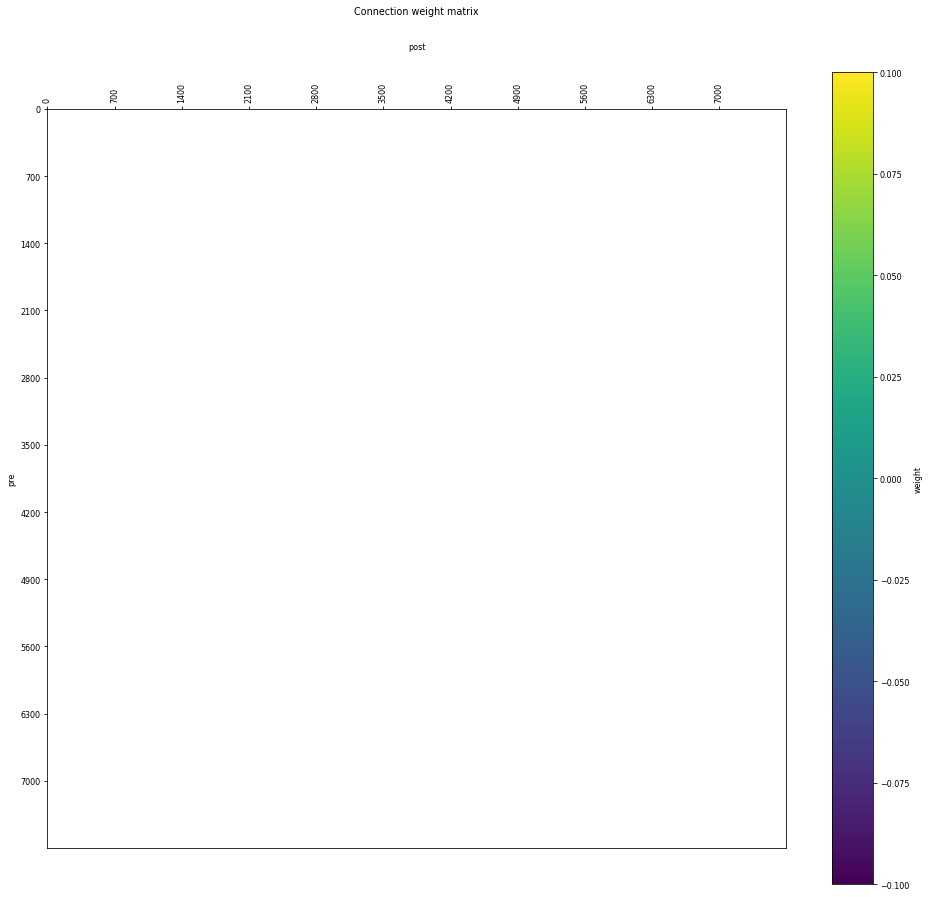

In [34]:
features = ['weight'] #,'convergence'
groups =['cell']
for feat in features:
   for group in groups:
        sim.analysis.plotConn(includePre=cfg.allpops, includePost = cfg.allpops, feature=feat, groupBy=group, figSize=(15,15), orderBy='gid', graphType='matrix', fontSize=8, saveData=None, 
                               saveFig=False, showFig=False);

Plotting connectivity matrix...


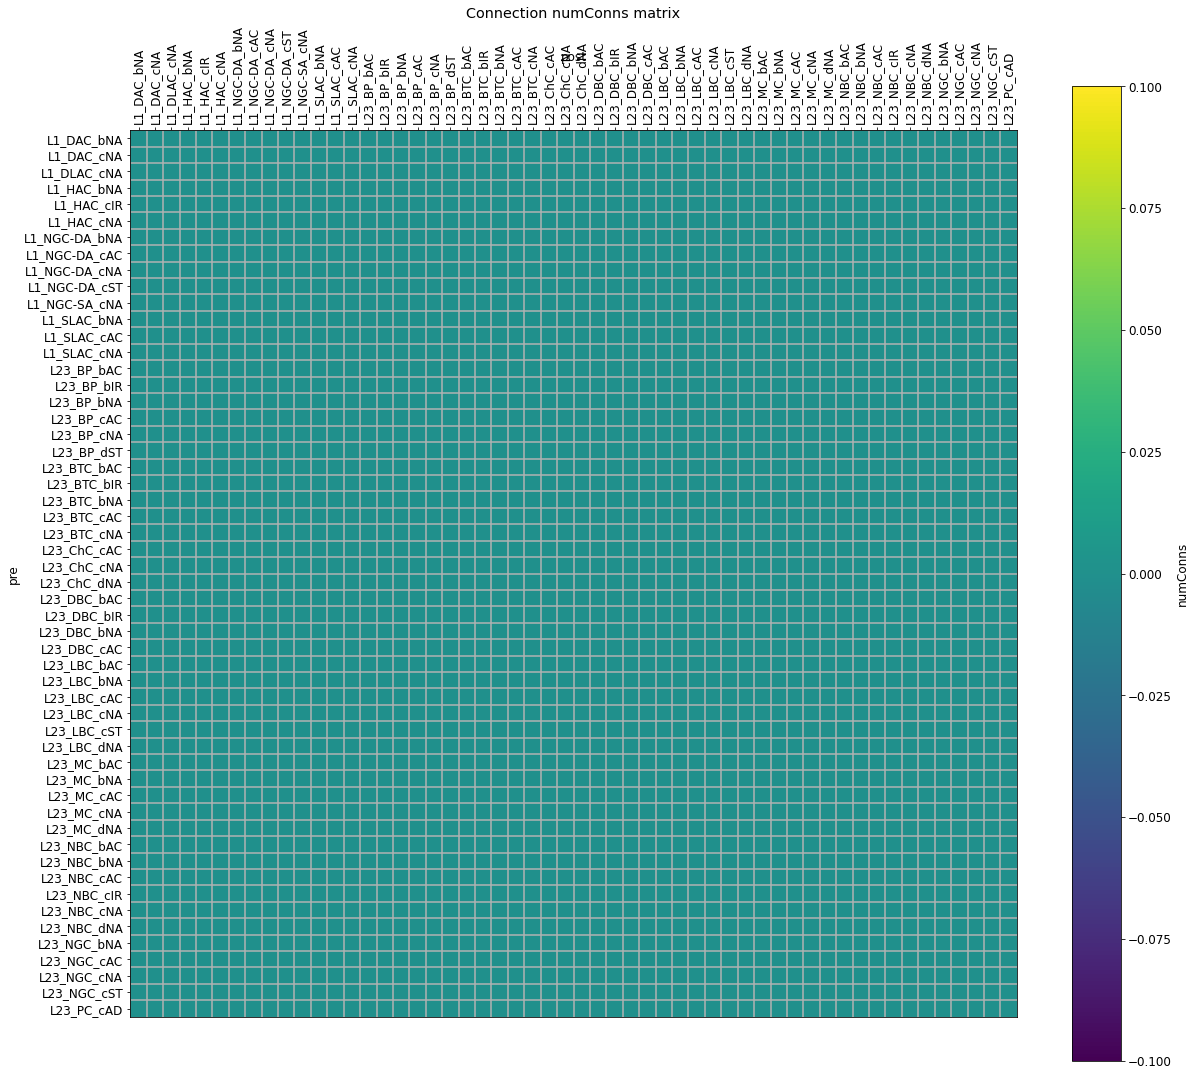

In [35]:
# features = ['numConns','convergence'] includePre=cfg.allpops, includePost = cfg.allpops,
test = sim.analysis.plotConn(includePre=cfg.allpops, includePost = cfg.allpops, feature='numConns', figSize=(18, 18), fontSize=12, saveData=None, 
                               saveFig=True, showFig=False);

In [36]:
# sim.analysis.plot2Dnet()

In [37]:
test[1]['connMatrix'] # total of synapses [AMPA, NMDA] or [GABAA, GABAB]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
connNumber = connData['connNumber']
synperconnNumber = connData['synperconnNumber']
     
connNetPyNE = {}
for pre in subPopLabels:
    connNetPyNE[pre] = {}
    for post in subPopLabels:        
        connNetPyNE[pre][post] = 0
            
i=0
for pre in subPopLabels:
    for cellpre in cfg.popLabelEl[pre]:
        j=0
        for post in subPopLabels:
            for cellpost in cfg.popLabelEl[post]:
                 
                connBBP = float(connNumber[pre][post])
                if connBBP > 0:
                    synperconn = int(synperconnNumber[pre][post]+0.5)       

                    connNetPyNE[pre][post] += test[1]['connMatrix'][i][j]/synperconn
#                 print(i,j,test[1]['connMatrix'][i][j]/synperconn)
                j+=1
        i+=1
  
for pre in subPopLabels:
    for post in subPopLabels:  
            connBBP = float(connNumber[pre][post])      
            if pre not in Epops and post not in Epops and connBBP>200:
                print('\t%s->%s  \t - \t  BBP = %5.1f   \t    NetPyNE = %5.1f  \t   Error = %5.1f' % (pre,post,connBBP,connNetPyNE[pre][post],100*(connNetPyNE[pre][post]-connBBP)/connBBP),'%')


	L1_DAC->L23_MC  	 - 	  BBP = 212.7   	    NetPyNE =   0.0  	   Error = -100.0 %
	L1_HAC->L23_MC  	 - 	  BBP = 331.3   	    NetPyNE =   0.0  	   Error = -100.0 %
	L1_NGC-DA->L23_MC  	 - 	  BBP = 231.6   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_BTC->L23_LBC  	 - 	  BBP = 460.3   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_BTC->L23_MC  	 - 	  BBP = 393.1   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_BTC->L23_NBC  	 - 	  BBP = 298.0   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_DBC->L23_LBC  	 - 	  BBP = 444.9   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_DBC->L23_MC  	 - 	  BBP = 386.6   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_DBC->L23_NBC  	 - 	  BBP = 290.1   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_LBC->L23_BTC  	 - 	  BBP = 272.4   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_LBC->L23_DBC  	 - 	  BBP = 227.4   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_LBC->L23_LBC  	 - 	  BBP = 1305.7   	    NetPyNE =   0.0  	   Error = -100.0 %
	L23_LBC

Plotting 2D representation of network cell locations and connections...


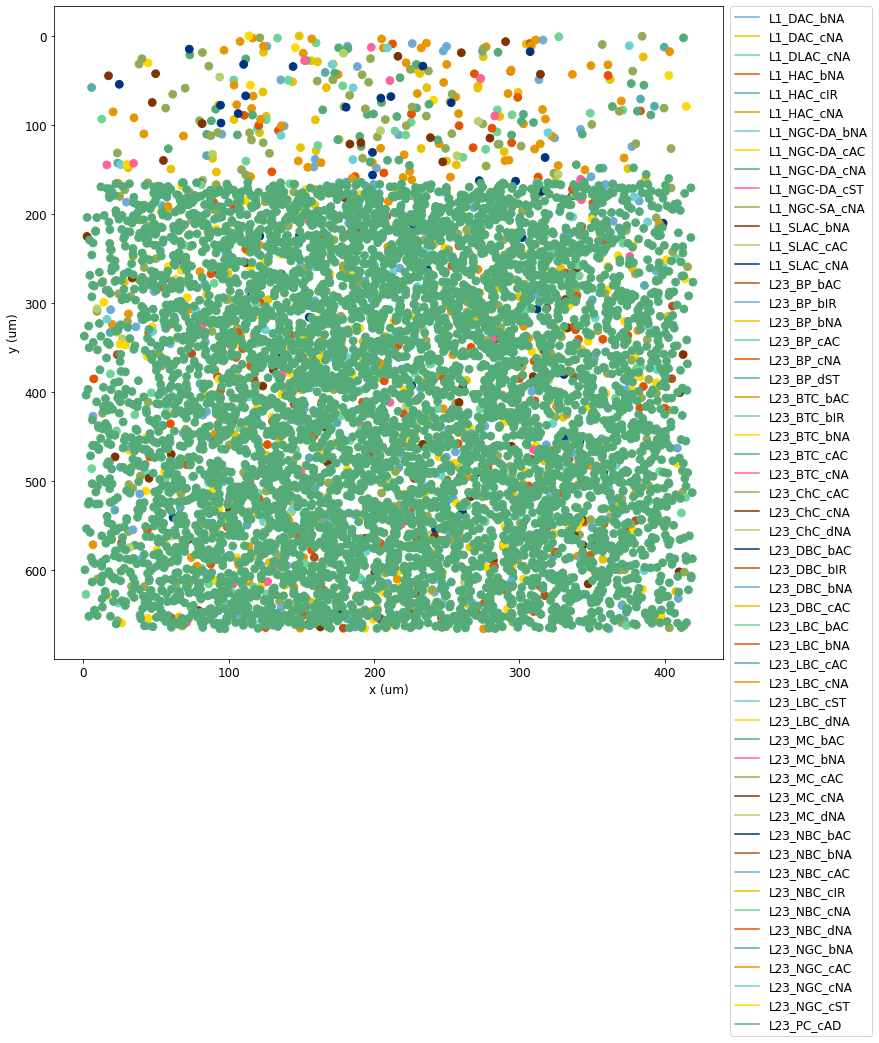

In [39]:
# sim.analysis.plot2Dnet(include=cfg.allpops, view='xy', showConns=True, 
#                                popColors=None, tagsFile=None, figSize=(12, 12), fontSize=8, saveData=None, 
#                                saveFig=False, showFig=True, lineWidth=0.1);
sim.analysis.plot2Dnet(include=cfg.allpops,view='xy', showConns=False, 
                               popColors=None, tagsFile=None, figSize=(12, 12), fontSize=12, saveData=None, 
                               saveFig=None, showFig=True, lineWidth=0.1);
# sim.analysis.plot2Dnet(include=subPopLabels,view='xz', showConns=False, 
#                                popColors=None, tagsFile=None, figSize=(8, 8), fontSize=12, saveData=None, 
#                                saveFig=None, showFig=True, lineWidth=0.1);

## Raster and traces

In [40]:
# include=cfg.allpops, 
# sim.analysis.plotRaster(include=cfg.allpops, timeRange=[0,cfg.duration], orderBy='gid', orderInverse=True, labels='legend', popRates=True, lw=5, marker='.', markerSize=24, figSize=(20, 10), fontSize=20, dpi=300, saveFig=True, showFig=False);

In [41]:
# cellNumber[metype]
# for metype in cfg.cellParamLabels:
#     if cfg.popLabel[metype] in subPopLabels:
#         print(metype,cfg.cellNumber[metype],cfg.popLabel[metype],cfg.popNumber[cfg.popLabel[metype]])     

# traces = [(mtype, [i for i in range(0,cfg.popNumber[mtype],int(cfg.popNumber[mtype]/4.5))]) for mtype in subPopLabels]
# traces

In [42]:
# include=traces, 
# sim.analysis.plotTraces(timeRange=[0,cfg.duration], overlay=False, oneFigPer='trace', ylim=[-90,50], subtitles= False, axis=False, scaleBarLoc=1, figSize=(24, 15), fontSize=12, saveFig=True);

In [43]:
# for pops in cfg.cellParamLabels:
#     print('\n\n',pops,'  N =',cfg.cellNumber[pops])
#     sim.analysis.plotTraces(include=[pops], timeRange=[0,cfg.duration], overlay=True, oneFigPer='trace', subtitles=False, legend=False, ylim=[-110,50], axis=False, scaleBarLoc=3, figSize=(18, 4), fontSize=15, saveFig='../info/test/'+cfg.simLabel+'/'+cfg.simLabel +'_'+pops+ '_Vt.png');

In [44]:
# netParams.cellParams.keys()

In [45]:
#  sim.analysis.plotTraces(include=[pops], timeRange=[0,cfg.duration], overlay=True, oneFigPer='trace', subtitles=False, legend=False, ylim=[-75,-74], axis=False, scaleBarLoc=3, figSize=(18, 8), fontSize=15, saveFig='../info/test/'+cfg.simLabel+'/'+cfg.simLabel +'_'+pops+ '_Vt.png');

In [46]:
sim.net.cells[-1].stims

[]

In [47]:
sim.net.cells[-1].conns

[]